## Import Library

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

plt.style.use('seaborn')

### Baca Dataset

In [26]:
df = pd.read_csv('../Datasets/spam.tsv', sep='\t')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1) # Drop kolom yang tidak digunakan
df.columns = ['label','email'] # Merubah nama kolom
df

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Exploratory Data Analyst (EDA) Dataset

In [27]:
# Melihat jumlah data spam & ham
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

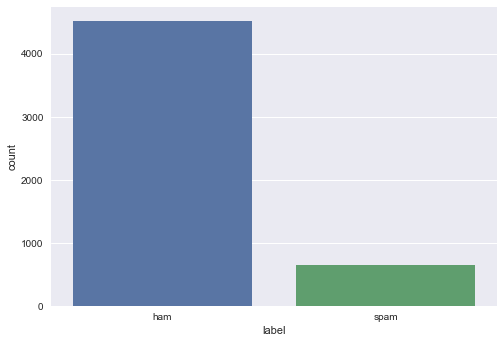

In [36]:
sns.countplot(x='label', data=df);

Nampak data label memiliki imbalace data, ini akan membuat hasil modeling menghasilkan hasil yang kurang tepat. Kita harus memperbaikinya.

In [28]:
# Check data missing value
df.isnull().sum()

label    0
email    0
dtype: int64

In [31]:
# Cek data duplikat
dupli = df[df.duplicated(subset=['email'])] # Cek data duplikat
df.drop_duplicates(subset=['email'], inplace=True) # Drop/membuang data duplikat
df

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Cek outliers
